<a href="https://colab.research.google.com/github/Dhanyamanogaran/datascience_tasks/blob/main/DataPreprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



**Step 2: Importing dataset**

In [ ]:
data=pd.read_csv("/content/Data.csv")

In [ ]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
data.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


**Step 3: Handling the missing data**

In [ ]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

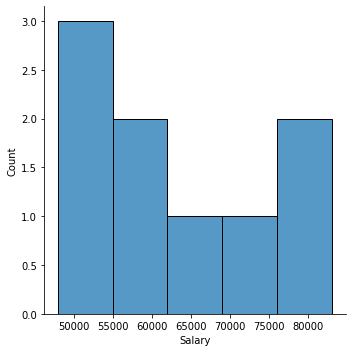

In [ ]:
#analysing the distribution of salary
sns.displot(data.Salary)

In [ ]:
#replace missing value with mean
data['Salary'].fillna(data['Salary'].mean(),inplace=True)

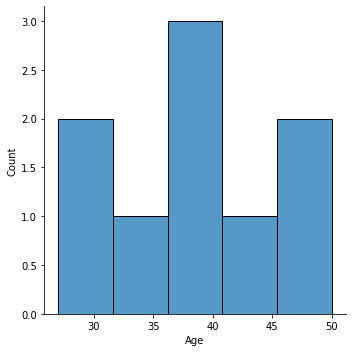

In [ ]:
# analysing the distribution of age
sns.displot(data.Age)

In [ ]:
#replace missing value with median
data['Age'].fillna(data['Age'].median(),inplace=True)

In [ ]:
data.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [ ]:
#finding the count of different labels
data['Purchased'].value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

In [ ]:
#loading the labelEncoder function
label_encode = LabelEncoder()

In [ ]:
labels= label_encode.fit_transform(data.Purchased)

**Step 5: Creating a dummy variable**

In [ ]:
#appending the labels to the dataframe
data['target']=labels

In [ ]:
data.head()

,Country,Age,Salary,Purchased,target
0,France,44.0,72000.0,No,0
1,Spain,27.0,48000.0,Yes,1
2,Germany,30.0,54000.0,No,0
3,Spain,38.0,61000.0,No,0
4,Germany,40.0,NaN,Yes,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
# separating the data and labels
X= data.drop(columns='Purchased',axis=1)
Y= data['Purchased']

In [ ]:
print(X)

   Country   Age   Salary  target
0   France  44.0  72000.0       0
1    Spain  27.0  48000.0       1
2  Germany  30.0  54000.0       0
3    Spain  38.0  61000.0       0
4  Germany  40.0      NaN       1
5   France  35.0  58000.0       1
6    Spain   NaN  52000.0       0
7   France  48.0  79000.0       1
8  Germany  50.0  83000.0       0
9   France  37.0  67000.0       1


In [ ]:
print(Y)

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object


In [ ]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(10, 4) (8, 4) (2, 4)


**Step 7: Feature Scaling**

In [ ]:
stand= StandardScaler()
X_train = stand.fit_transform(X_train)

In [ ]:
X_train


,Country,Age,Salary,target
5,France,35.0,58000.0,1
0,France,44.0,72000.0,0
7,France,48.0,79000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
6,Spain,NaN,52000.0,0
9,France,37.0,67000.0,1
8,Germany,50.0,83000.0,0
